# 1) Introduction

In this homework, time series analysis of:

    - General economic situation expectation over the next 12 months 
    - USD-TL exchange rate
    - CPI level  
    - Total industrial production 
    
of Turkey are investigated using the monthly data of the 2012 Jan - 2021 Dec period (Data is obtained from EVDS system). This project aims to investigate each data seperately to see trends and patterns. After looking at the series, the project tries to understand if these series have correlation between.

In the second part of the project, search volume of the following terms are investigated to understand if there is a significant correlation between real data change and the search volume of the related key words.

    -Dollar (Dolar)
    -Job Postings Abroad (Yurtdışı İş İlanları)
    -Inflation (Enflasyon)

Search volume of these words are obtained from "Google Trends"

# 2) Gathering the Data from EVDS

These packages should be installed first.

In [1]:
#install.packages("readxl")
#install.packages("lubridate")
#install.packages("zoo")
#install.packages("ggplot2")
#install.packages("scales")
#install.packages("data.table")
#install.packages("corrplot")
#install.packages("ggcorrplot")
#install.packages('GGally')
#install.packages("gtrendsR")

In [15]:
options(warn=-1)

library(readxl)
library(lubridate)
library(zoo)
library(ggplot2)
library(scales)
library(data.table)
library(corrplot)
library(gtrendsR)
library(ggcorrplot)

options(warn=0)

I transformed the data into data.table format where all data sets are combined in one data called "Total_Data" and manipulated the data in order to use the wanted date range and turned all the elements of the data to numeric variables.

In [3]:
#Getting the data

setwd("C:\\Users\\sonef\\Desktop")
Total_Data <- read_excel("EVDS.xlsx")
Total_Data <- data.table(Total_Data)

StartIndex = which(Total_Data$Date=="2012-01")
FinishIndex = which(Total_Data$Date=="2021-12")

Total_Data <- Total_Data[StartIndex:FinishIndex,]
colnames(Total_Data) = c("Dates","Industrial_Production","USD_TL_Exchange_Rate"
                         ,"CPI","General_Expectation")
rownames(Total_Data) = 1:nrow(Total_Data)

Total_Data$Industrial_Production <- as.numeric(Total_Data$Industrial_Production)
Total_Data$USD_TL_Exchange_Rate <- as.numeric(Total_Data$USD_TL_Exchange_Rate)

Total_Data$Dates <- paste(Total_Data$Dates,"-01",sep="")
Total_Data$Dates <- as.Date(Total_Data$Dates)

head(Total_Data)

Dates,Industrial_Production,USD_TL_Exchange_Rate,CPI,General_Expectation
2012-01-01,74.97504,1.838936,201.98,102.24720
2012-02-01,73.39412,1.751090,203.12,103.48562
2012-03-01,83.76683,1.779295,203.96,102.92138
2012-04-01,80.29805,1.779840,207.05,94.76370
2012-05-01,86.81221,1.796955,206.61,102.16517
2012-06-01,86.14740,1.816071,204.76,97.99052


# 3) Visualizing the Data Sets

## a) General Economic Situation Expectation Over the Next 12 Months

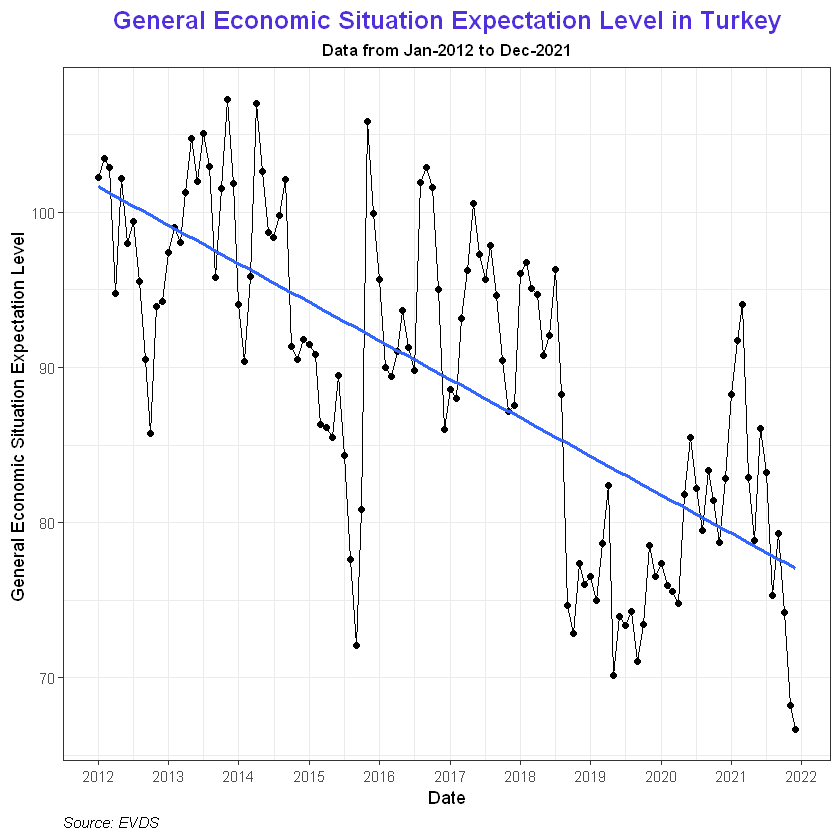

In [4]:
##General_Expectation
ggplot(data=Total_Data)+
  geom_line(mapping=aes(x=Dates,y=General_Expectation))+
  geom_point(mapping=aes(x=Dates,y=General_Expectation) )+
  labs(title = "General Economic Situation Expectation Level in Turkey", x = "Date",y = "General Economic Situation Expectation Level ",subtitle = "Data from Jan-2012 to Dec-2021",caption = "Source: EVDS")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 year",labels=date_format("%Y"))+
  geom_smooth(mapping=aes(x=Dates,y=General_Expectation) ,formula = y ~ x, method = "lm",level=0)

There is a clearly decreasing trend in the data. There is not a clear seasonality in the data but there are many fluctuations and there are some strong changes from month to month which indicates expectations of people are considerably volatile

## b) USD - TL Exchange Rates


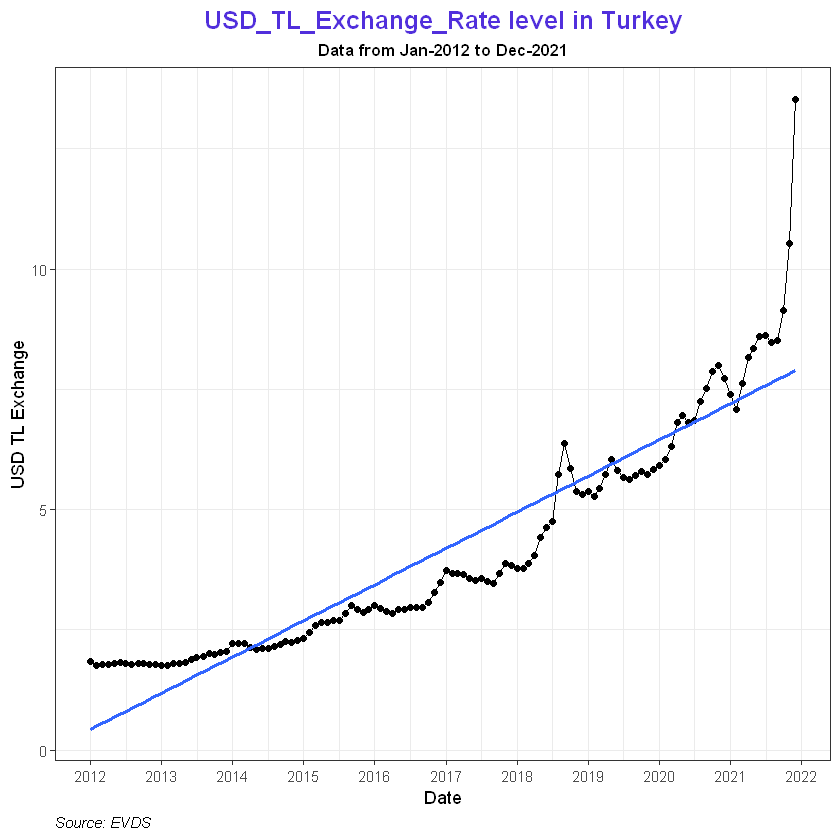

In [5]:
##USD_TL_Exchange_Rate
ggplot(data=Total_Data,aes(group=1))+
  geom_line(mapping=aes(x=Dates,y=USD_TL_Exchange_Rate))+
  geom_point(mapping=aes(x=Dates,y=USD_TL_Exchange_Rate) )+
  labs(title = "USD_TL_Exchange_Rate level in Turkey", x = "Date",y = "USD TL Exchange",subtitle = "Data from Jan-2012 to Dec-2021",caption = "Source: EVDS")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 year",labels=date_format("%Y"))+
  geom_smooth(mapping=aes(x=Dates,y=USD_TL_Exchange_Rate), formula = y ~ x, method = "lm",level=0 )



USD-TL exchange rate is in an exponentially increasing trend where there are some strong fluctuations. These fluctuations may be explained by some political events. To see the increment more clearly, we can look at the log differences graphic.

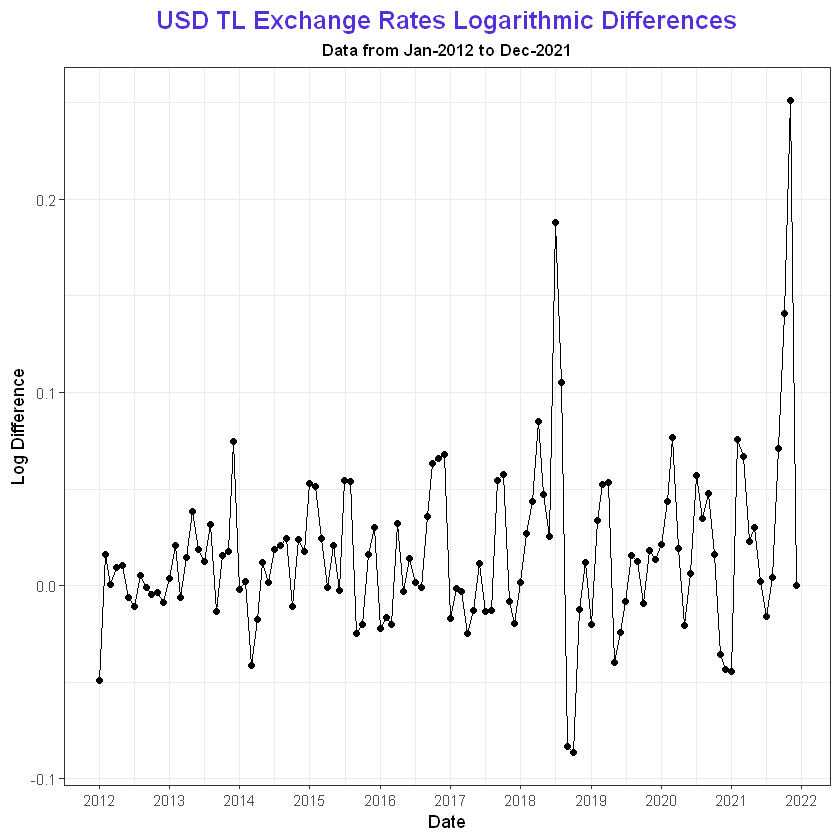

In [6]:
Exchange_Rate_Logarithm_Difference <- c(diff(log(Total_Data$USD_TL_Exchange_Rate)),0.00001)
Total_Data <- cbind(Total_Data, Exchange_Rate_Logarithm_Difference)

ggplot(data=Total_Data)+
  geom_line(mapping=aes(x=Dates,y=Exchange_Rate_Logarithm_Difference))+
  geom_point(mapping=aes(x=Dates,y=Exchange_Rate_Logarithm_Difference) )+
  labs(title = "USD TL Exchange Rates Logarithmic Differences", x = "Date",y = "Log Difference",subtitle = "Data from Jan-2012 to Dec-2021")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 year",labels=date_format("%Y"))





By looking at the log difference data of the USD-TL exchange rate, it can be clearly seen that most of the data is above zero which means there is sustained depreciation of TL against USD.

## c) CPI Level in Turkey

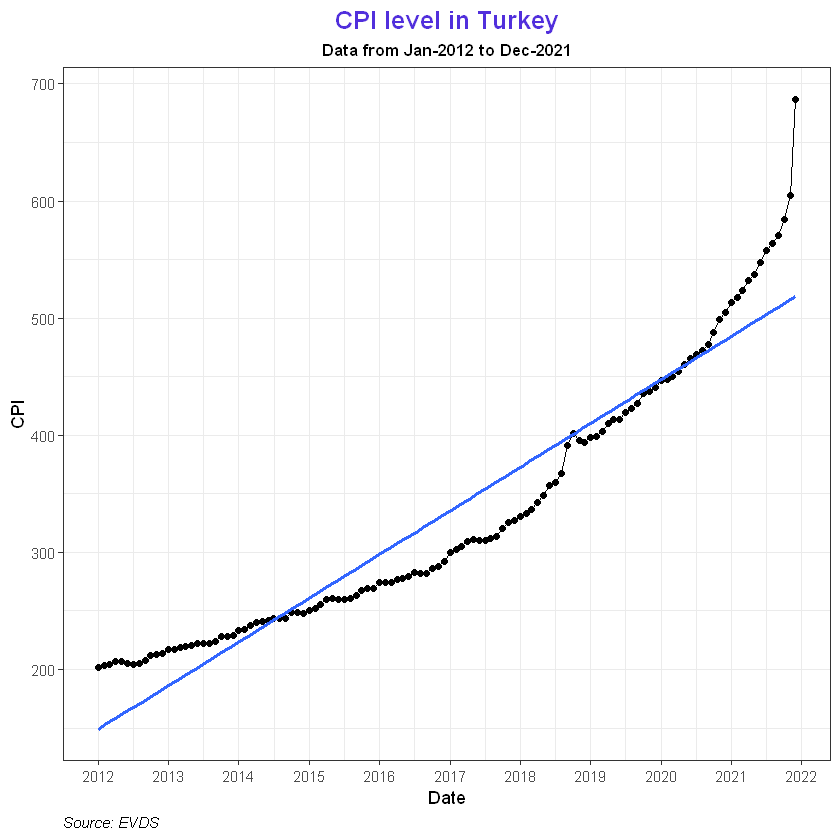

In [7]:
##CPI
ggplot(data=Total_Data)+
  geom_line(mapping=aes(x=Dates,y=CPI))+
  geom_point(mapping=aes(x=Dates,y=CPI) )+
  labs(title = "CPI level in Turkey", x = "Date",y = "CPI",subtitle = "Data from Jan-2012 to Dec-2021",caption = "Source: EVDS")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 year",labels=date_format("%Y"))+
  geom_smooth(mapping=aes(x=Dates,y=CPI), formula = y ~ x, method = "lm",level=0 )


CPI level in Turkey is exponantially increasing which indicates a strong and persistent inflation. There is not a significant seosanility in the data. Note that the data behaviour is exactly same with the USD - TL exchange rate since Turkey is an open economy where price levels are highly correlated with exchange rate level.

## d) Total Industrial Production Level in Turkey

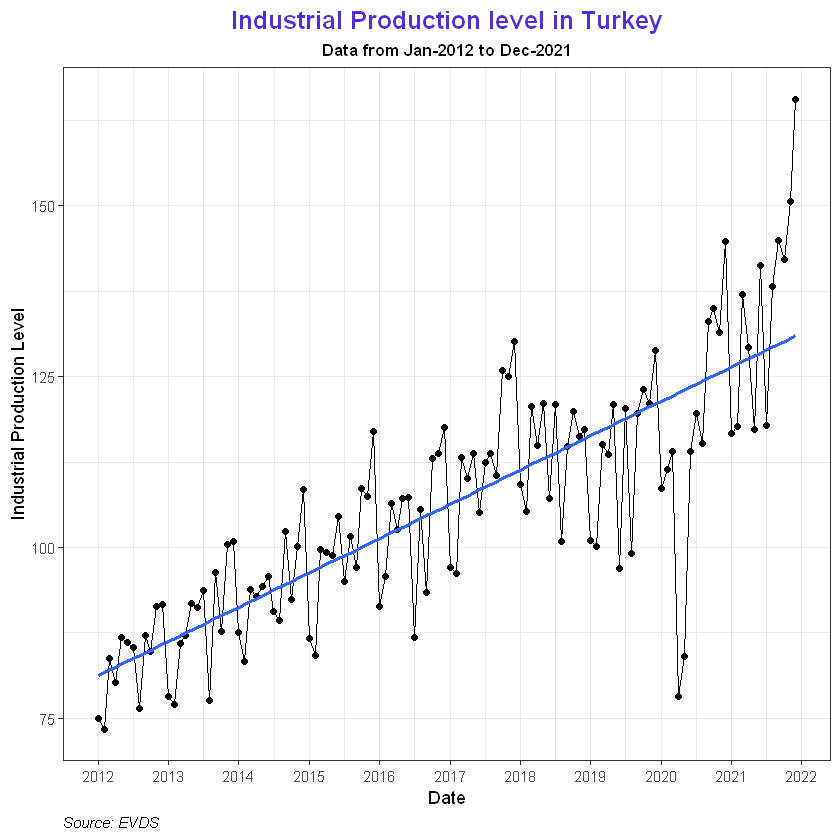

In [8]:
##Industrial_Production
ggplot(data=Total_Data,aes(group=1))+
  geom_line(aes(x=Dates,y=Industrial_Production))+
  geom_point(mapping=aes(x=Dates,y=Industrial_Production) )+
  labs(title = "Industrial Production level in Turkey", x = "Date",y = "Industrial Production Level",subtitle = "Data from Jan-2012 to Dec-2021",caption = "Source: EVDS")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 year",labels=date_format("%Y"))+
  geom_smooth(mapping=aes(x=Dates,y=Industrial_Production), formula = y ~ x, method = "lm",level=0 )


Total industry production is in an increasing trend where there is a significant seasonality. We can see the seosanality more clearly by looking at the data of one year.

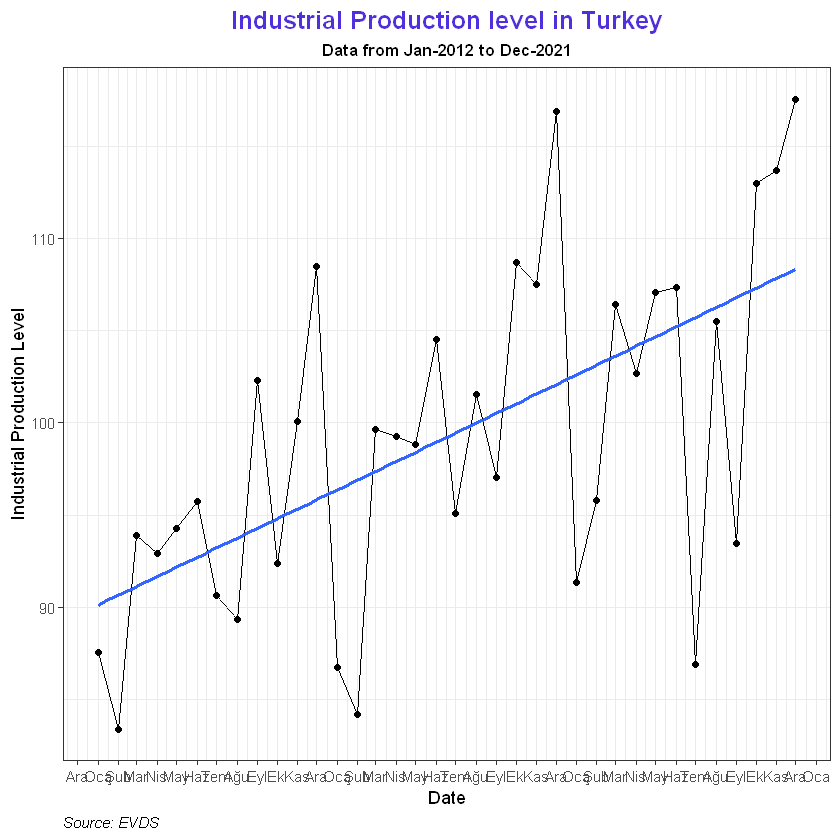

In [9]:

ggplot(data=Total_Data[Dates>='2014-01-01' & Dates<='2016-12-01'],aes(group=1))+
  geom_line(aes(x=Dates,y=Industrial_Production))+
  geom_point(mapping=aes(x=Dates,y=Industrial_Production) )+
  labs(title = "Industrial Production level in Turkey", x = "Date",y = "Industrial Production Level",subtitle = "Data from Jan-2012 to Dec-2021",caption = "Source: EVDS")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 month",labels=date_format("%b"))+
  geom_smooth(mapping=aes(x=Dates,y=Industrial_Production), formula = y ~ x, method = "lm",level=0 )


Now, it can be clearly seen that total production gets to the top at the end of the year and then falls significantly at the beginning of the new year. Also, total production is above the average at autumn and it drops at the end of the summer.

# 3) Comparison of the Data Sets

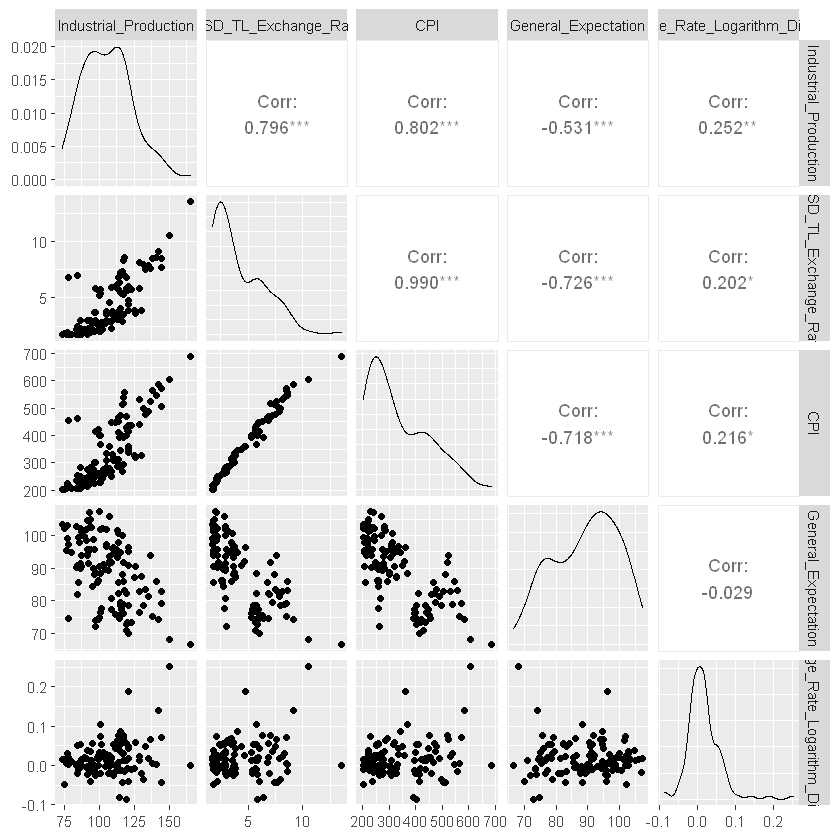

In [16]:
require(GGally)
ggpairs(Total_Data[,-1,with=FALSE])

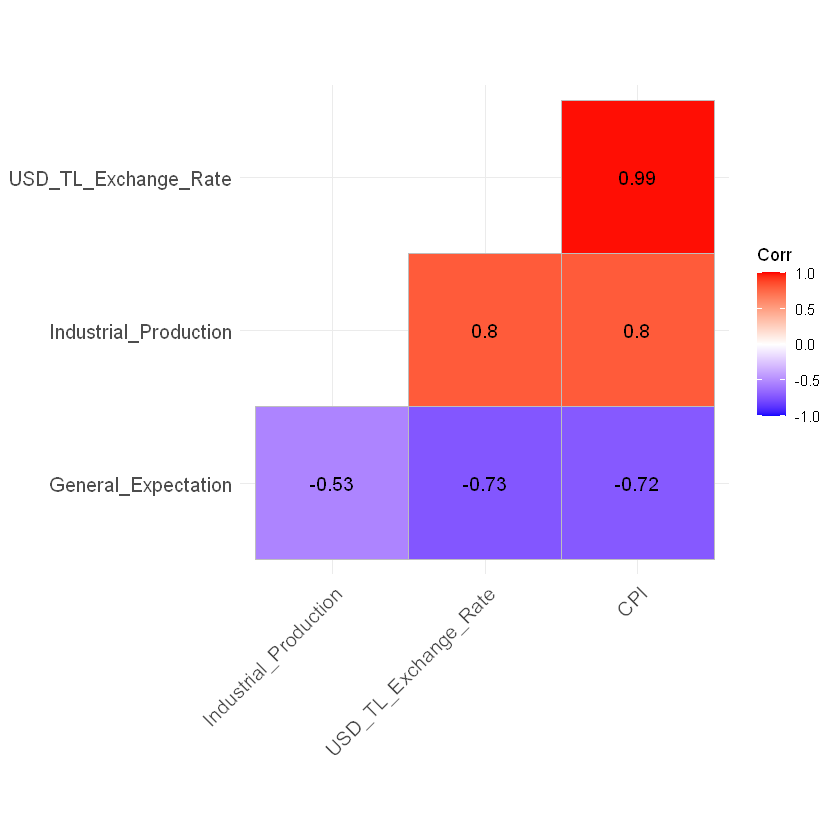

In [11]:
correl_info=cor(Total_Data[,2:5])

ggcorrplot(correl_info, 
           hc.order = TRUE, 
           type = "lower",
           lab = TRUE)


Both pair table and correlation table indicates some important relationships between data sets:<br><br>
    -Industrial production, exchange rate and CPI level are highly positive correlated to each other whereas General expectation is highly negatively correlated with other data sets.<br>
    -Correlation between USD-TL exchange rate is nearly one which indicates a very strong relationship. Because of this very strong correlation, a researcher choose to drop one of the variables (either exchange rate or CPI level) without losing significant amount of information<br>
    

## 4) Looking at the Google Trends Data

Data is downloaded from GoogleTrends, imported to R and then stored in a data.table format.

In [12]:
dolar=read.csv("dolar.csv",header=FALSE,sep=",")
colnames(dolar) <- c("Ay","dolar")
dolar[,"Ay"]=as.Date(as.yearmon(dolar[,"Ay"],format="%Y-%m"))
dolar[,"dolar"]=as.numeric(dolar[,"dolar"])

dolar <- data.table(dolar)
dolar <- dolar[Ay>='2012-01-01' & Ay<='2021-12-01']

YurtDisiIs=read.csv("YurtDisiIs.csv",header=FALSE,sep=",")
colnames(YurtDisiIs) <- c("Ay","YurtDisiIs")
YurtDisiIs[,"Ay"]=as.Date(as.yearmon(YurtDisiIs[,"Ay"],format="%Y-%m"))
YurtDisiIs[,"YurtDisiIs"]=as.numeric(YurtDisiIs[,"YurtDisiIs"])

YurtDisiIs <- data.table(YurtDisiIs)
YurtDisiIs <- YurtDisiIs[Ay>='2012-01-01' & Ay<='2021-12-01']

enflasyon=read.csv("enflasyon.csv",header=FALSE,sep=",")
colnames(enflasyon) <- c("Ay","enflasyon")
enflasyon[,"Ay"]=as.Date(as.yearmon(enflasyon[,"Ay"],format="%Y-%m"))
enflasyon[,"enflasyon"]=as.numeric(enflasyon[,"enflasyon"])

enflasyon <- data.table(enflasyon)
enflasyon <- enflasyon[Ay>='2012-01-01' & Ay<='2021-12-01']


I plotted search volume of the "dolar" and "enflasyon" and then compared those volumes with logarithmic difference of exchange rate data to see if there is a correlation or not.

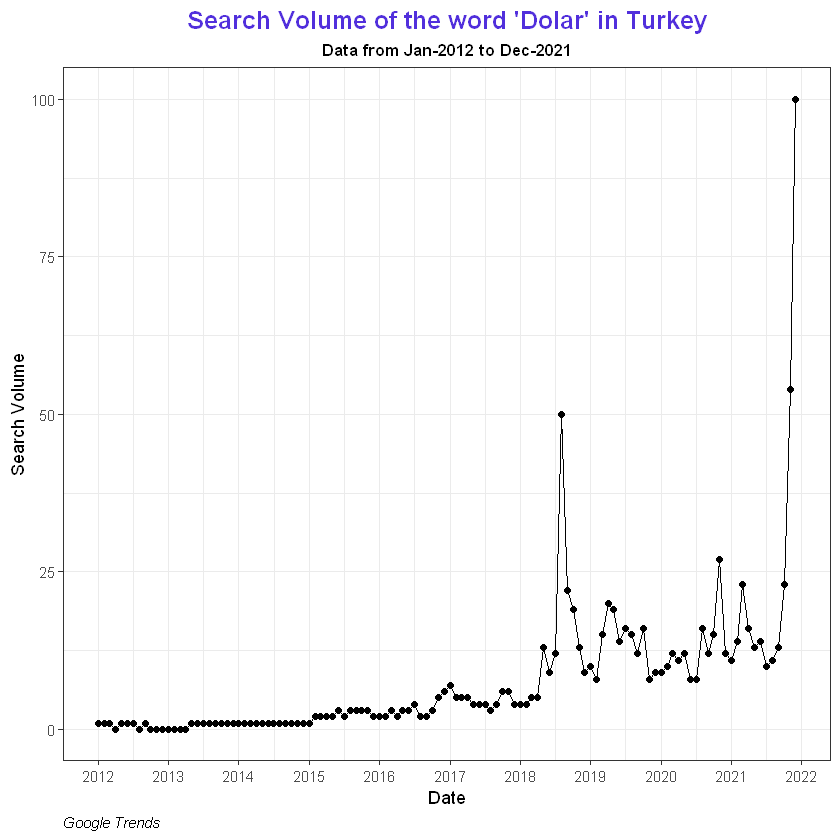

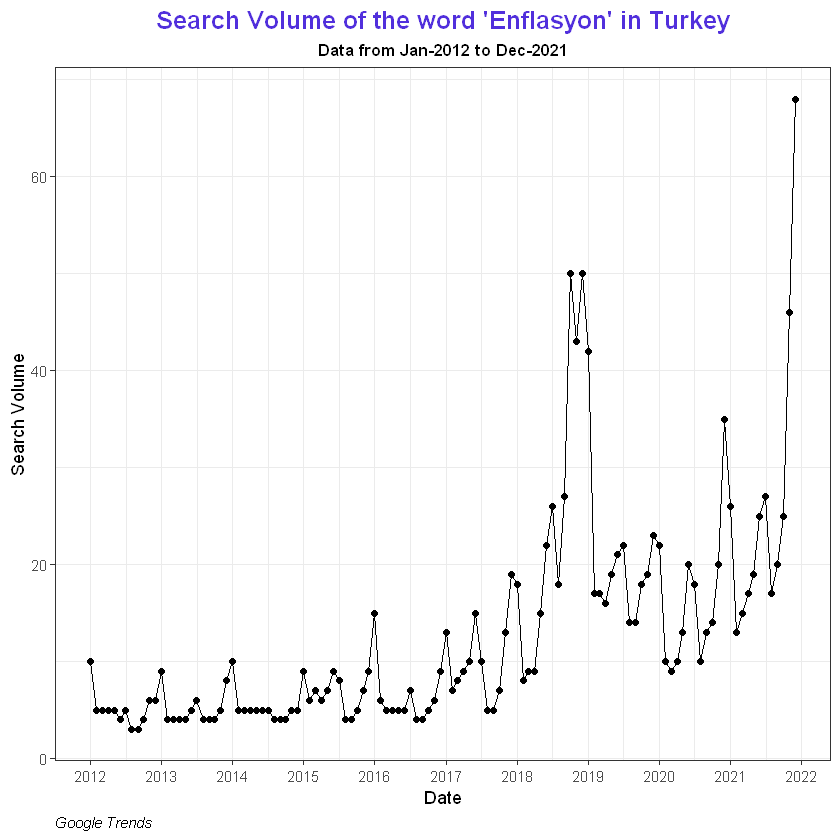

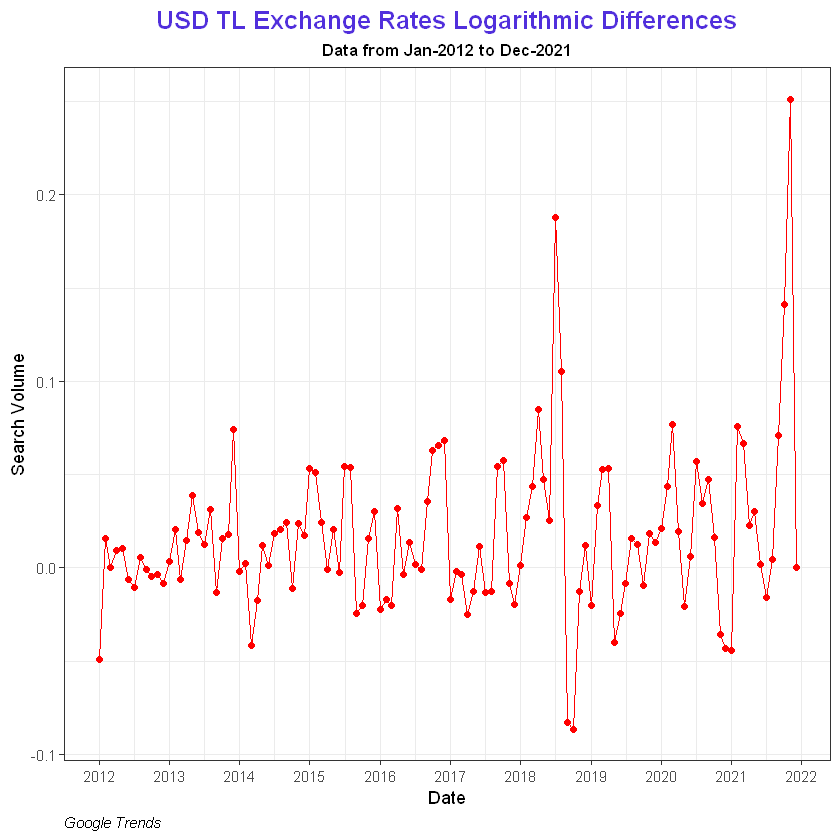

In [13]:
ggplot(data=dolar)+
  geom_line(aes(x=Ay,y=dolar))+
  geom_point(mapping=aes(x=Ay,y=dolar) )+
  labs(title = "Search Volume of the word 'Dolar' in Turkey", x = "Date",y = "Search Volume",subtitle = "Data from Jan-2012 to Dec-2021",caption = "Google Trends")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 year",labels=date_format("%Y"))



ggplot(data=enflasyon)+
  geom_line(aes(x=Ay,y=enflasyon))+
  geom_point(mapping=aes(x=Ay,y=enflasyon) )+
  labs(title = "Search Volume of the word 'Enflasyon' in Turkey", x = "Date",y = "Search Volume",subtitle = "Data from Jan-2012 to Dec-2021",caption = "Google Trends")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 year",labels=date_format("%Y"))


ggplot(data=Total_Data)+
  geom_line(mapping=aes(x=Dates,y=Exchange_Rate_Logarithm_Difference),color = "red")+
  geom_point(mapping=aes(x=Dates,y=Exchange_Rate_Logarithm_Difference),color = "red" )+
  labs(title = "USD TL Exchange Rates Logarithmic Differences", x = "Date",y = "Search Volume",subtitle = "Data from Jan-2012 to Dec-2021",caption = "Google Trends")+
  theme_bw()+ 
  theme(plot.title = element_text(color = "#512FDC", size = 15, face = "bold",hjust=0.5), 
                    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
                    plot.caption = element_text(face = "italic", hjust = 0))+scale_x_date(date_breaks = "1 year",labels=date_format("%Y"))


By comparing search volume of "dolar" and "enflasyon" with logarithmic difference curve of the TL-USD exchange rate, it can be clearly seen that change in exchange rate is highly correlated with search volume of these two words. This is expected since USD is a major investment tool and also, prices change in the periods where exchange rate changes so people try to learn more about these changes by looking at the current exchange rate (by searching "dolar") and also by looking at the inflation information (by searching "enflasyon")

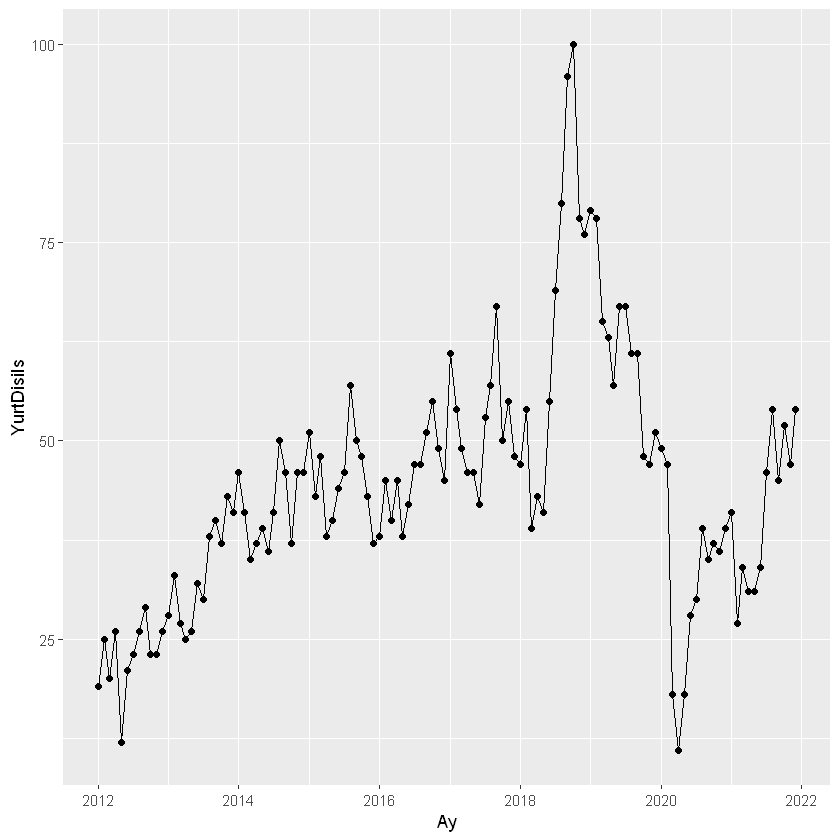

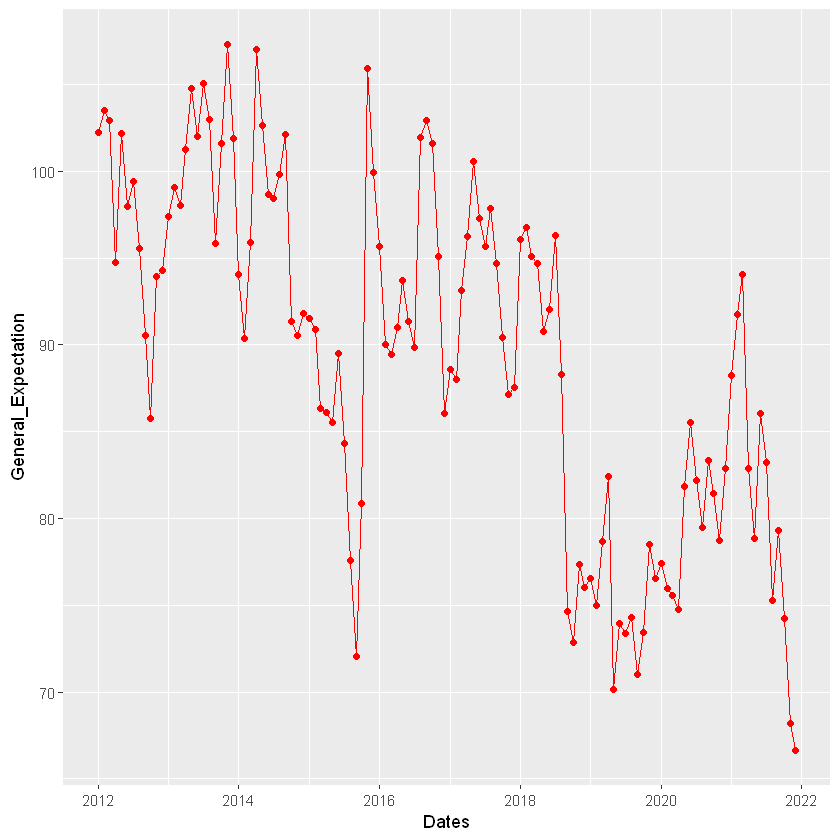

In [14]:
ggplot(data=YurtDisiIs)+
  geom_line(aes(x=Ay,y=YurtDisiIs))+
  geom_point(mapping=aes(x=Ay,y=YurtDisiIs) )

ggplot(data=Total_Data)+
  geom_line(mapping=aes(x=Dates,y=General_Expectation),color = "red")+
  geom_point(mapping=aes(x=Dates,y=General_Expectation),color = "red" )


The search volume of "yurtdışı iş ilanları" represents eagerness of people to leave the Turkey which is highly negatively correlated with people's future expectations on economic situtations of Turkey. Search volume is increasing where people's expectations get worse.

## 5) Conclusions.
The aim of this report was analyzing the chosen series first individually and then investigating the relationship between them. After the analysis, correlation between changes in the data and search volume of some keywords that are highly related with the data are investigated.

Conclusions are:

CPI level and TL-USD exchange rate is highly positively correlated and General economic situation expectation over the next 12 months is highly negatively correlated with these two variables.

Total production is in an increasing trend and it peaks at the end of the year, bottoms at the beginning of the year.

Search volume of "enflasyon" and "dolar" is highly correlated with change in exchange rate and CPI level 

There is an increasing trend in the search volume of "yurtdışı iş ilanları" which is highly negatively correlated with worsening general economic situtation expectations.